# A Machine Learning Approach to Predict Readmissions among Diabetic Inpatients (1999–2008)
### Exploring hospital readmissions among diabetic patients using real-world clinical data (1999–2008)


## 1. Introduction & Dataset Overview

This project explores the **Diabetes 130-US Hospitals for Years 1999–2008** dataset curated by researchers from Virginia Commonwealth University [1]. Spanning **real** clinical data from 130 U.S. hospitals across a decade (1999–2008), the dataset comprises hospital admission records of patients diagnosed with diabetes, each with up to 47 features covering demographics, clinical measurements, treatments, and prior healthcare utilization.

Each encounter includes data on factors such as:

- Patient demographics (e.g., age group, gender, race)  
- Admission details (e.g., type, source, length of stay)  
- Clinical measurements and labs (e.g., number of lab procedures, diagnoses)  
- Treatments (e.g., number of medications, diabetic-specific medications)  
- Prior utilization (e.g., number of outpatient, emergency, inpatient visits)

The principal analytic objective is to predict **hospital readmission** (within or after 30 days of discharge), a critical indicator for healthcare quality and cost, with implications for patient outcomes and hospital performance. Then, we visualize model predictions and metrics, along with most important features and key insights in order to be presented to healthcare providers.

### Dataset Highlights

| Attribute         | Details |
|------------------|---------|
| **Instances**     | 101,766 hospital stays |
| **Features**      | 47 distinct features covering categorical and numeric data |
| **Tasks**         | Binary classification (predicting readmission)|

No pre-defined train/test splits are provided, so a custom split or holdout strategy (train/test) will be used, along with cross-validation.

### Project Scope & Goals

**Primary Goal**  
- Build a predictive model to accurately classify whether a diabetic inpatient will be **readmitted within or after 30 days** of discharge.

**Secondary Objectives**  
- Conduct exploratory data analysis (EDA) to understand variable distributions, missingness, and inter-feature relationships.  
- Perform feature engineering such as encoding categorical variables, dealing with missing values, mapping and groupping codes to categoricals.  
- Compare performance of multiple classification algorithms (logistic regression, random forest, light gradient boosting machine).
- Select the most robust, scalable and high-performing model based on precision, recall, and ROC-AUC metrics.
- Identify the most important features to predict hospital readmission.
- Interpret model outputs to provide actionable insights for healthcare providers.

**References**

[1] B. Strack, J. P. DeShazo, C. Gennings, J. L. Olmo, S. Ventura, K. J. Cios, and J. N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” *BioMed Research International*, vol. 2014, Article ID 781670, 2014.

### Notebook Structure

Below is the roadmap this notebook will follow:

1. [Introduction & Dataset Overview](#1.-Introduction-&-Dataset-Overview)
2. [Data Acquisition & Initial Inspection](#2.-Data-Acquisition-&-Initial-Inspection)
   - [2.1. Load Data Files and Necessary Libraries](#2.1.-Load-Data-Files-and-Necessary-Libraries)
   - [2.2. Initial Data Inspection and Summary Statistics](#2.2.-Initial-Data-Inspection-and-Summary-Statistics)
3. [Exploratory Data Analysis (EDA): Understanding the Data](#3.-Exploratory-Data-Analysis-(EDA):-Understanding-the-Data)
   - [3.1. Analysis of Missing Values and Data Completeness](#3.1.-Analysis-of-Missing-Values-and-Data-Completeness)
   - [3.2. Target Variable Analysis: Assessing Class Imbalance](#3.2.-Target-Variable-Analysis:-Assessing-Class-Imbalance)
4. [Data Preprocessing & Feature Engineering](#4.-Data-Preprocessing-&-Feature-Engineering)
   - [4.1. Handling and Imputation of Missing Data](#4.1.-Handling-and-Imputation-of-Missing-Data)
   - [4.2. Univariate Analysis: Feature Distributions](#4.2.-Univariate-Analysis:-Feature-Distributions)
   - [4.3. Multivariate Analysis: Feature Relationships and Correlations](#4.3.-Multivariate-Analysis:-Feature-Relationships-and-Correlations)
   - [4.4. Feature Engineering: Grouping & Creating Predictive Variables](#4.4.-Feature-Engineering:-Grouping-&-Creating-Predictive-Variables)
   - [4.5. Constructing a Preprocessing Pipeline](#4.5.-Constructing-a-Preprocessing-Pipeline)
5. [Modeling & Evaluation: Algorithm Development and Tuning](#5.-Modeling-&-Evaluation:-Algorithm-Development-and-Tuning)
   - [5.1. Logistic Regression Model Implementation](#5.1.-Logistic-Regression-Model-Implementation)
   - [5.2. Random Forest Classifier Implementation](#5.2.-Random-Forest-Classifier-Implementation)
   - [5.3. Light Gradient Boosting Machine (LGBM) Classifier Implementation](#5.3.-Light-Gradient-Boosting-Machine-(LGBM)-Classifier-Implementation)
6. [Model Selection & Final Evaluation](#6.-Model-Selection-&-Final-Evaluation)
   - [6.1. Comparative Performance of Models](#6.1.-Comparative-Performance-of-Models)
   - [6.2. ROC Curves](#6.2.-ROC-Curves)
   - [6.3. Final Model Selection](#6.3.-Final-Model-Selection)
   - [6.4. Evaluation & Threshold Comparison of the Chosen Model](#6.4.-Evaluation-&-Threshold-Comparison-of-the-Chosen-Model)
8. [Conclusions, Insights & Next Steps](#7.-Conclusions,-Insights-&-Next-Steps)
   - [7.1. Key Conclusions](#7.1.-Key-Conclusions)
   - [7.2. Insights for Healthcare Providers](#7.2.-Insights-for-Healthcare-Providers)
   - [7.3. Next Steps](#7.3.-Next-Steps)
   - [7.4. Final Remark](#7.4.-Final-Remark)

## 2. Data Acquisition & Initial Inspection

The Diabetes 130-US hospitals dataset is a widely recognized benchmark in healthcare predictive modeling. It offers a realistic and complex use case for evaluating machine learning methods, as it encapsulates common challenges found in real-world electronic health records, such as class imbalance and high dimensionality.

The dataset is publicly available through the UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008. To access the data, a CSV file comprissing all the information can be downloaded, as well as importing the dataset using python, the latter approach is used, which enhances reproducibility and streamlines the workflow.

A preliminary data inspection is a critical first step, providing the foundational understanding necessary to guide effective feature engineering.

### 2.1. Load Data Files and Necessary Libraries
First, we begin by importing all the necessary modules we are going to use in this notebook, mainly pandas for data handling, sckit-learn for model building and evaluation, and lightgbm to implement a lgbm classifier.

In [1]:
# Standard library imports
import importlib.util
import os
import warnings

# Third-party library imports
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Scikit-learn imports
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    StratifiedKFold,
    train_test_split,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# LGBM import
from lightgbm import LGBMClassifier

# Filter warnings after all imports are complete
warnings.filterwarnings("ignore")

The data is loaded into the Python environment using the code below. This method provides efficient access to the dataset and its accompanying metadata, allowing us to proceed directly to the preprocessing and analysis stages.

In [2]:
package_name = "ucimlrepo"
# Returns a module spec object or None if package not found
spec = importlib.util.find_spec(package_name)

# Check whether the module is installed, else install it
if spec is None:
    print(f"{package_name} is NOT installed.")
    print(f"Installing {package_name} module....")
    !pip install ucimlrepo
    print(f"Succesfully installed {pacakge_name}")
else:
    print(f"The module {package_name} is already installed.")

from ucimlrepo import fetch_ucirepo 

# Fetch dataset 
diabetes_1999_2008 = fetch_ucirepo(id=296)
print('Data loaded: diabetes_1999_2008')

The module ucimlrepo is already installed.
Data loaded: diabetes_1999_2008


### 2.2. Initial Data Inspection and Summary Statistics

Next, we explore the metadata and the description of the variables in our data

In [3]:
# Accesing metadata 
print("Metadata:\n", diabetes_1999_2008.metadata) 
  
# Accesing variable information 
print("\nVariables description:\n", diabetes_1999_2008.variables)

Metadata:
 {'uci_id': 296, 'name': 'Diabetes 130-US Hospitals for Years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to 

From this description we can see the name of the different features, descriptions, data type and whether or not it has missing values.

Now, we create a pandas dataframe to handle data more efficiently and sample 10 encounters from the whole dataset to briefly examine our dataset

In [4]:
# Features and targets can be accesed 
# throught our data given as dataframes
features = diabetes_1999_2008.data.features 
targets = diabetes_1999_2008.data.targets 

# Create a pandas dataframe merging features 
# and targets into one dataframe
df = pd.concat([features, targets], axis=1)

# Set to display all columns
pd.set_option('display.max_columns', None)
df.sample(10)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
596,Caucasian,Male,[70-80),NaN,2,1,20,3,NaN,NaN,11,1,18,0,0,1,682,427,496,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
87925,Caucasian,Female,[90-100),NaN,1,22,7,7,MC,Orthopedics,62,1,11,0,0,0,820,250,790,5,NaN,>8,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
68078,AfricanAmerican,Female,[50-60),NaN,1,6,7,12,MC,NaN,73,6,61,2,0,0,414,411,491,9,NaN,Norm,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
96006,Caucasian,Male,[40-50),NaN,2,1,1,3,BC,Emergency/Trauma,71,1,12,1,0,1,486,276,327,9,NaN,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
73315,Caucasian,Male,[60-70),NaN,1,6,7,1,HM,NaN,66,1,12,1,1,1,280,444,276,8,NaN,>7,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
95537,AfricanAmerican,Female,[50-60),NaN,3,3,4,4,MC,NaN,32,1,6,0,0,1,853,585,404,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
3638,Caucasian,Female,[40-50),NaN,1,1,7,2,NaN,NaN,32,1,11,0,0,2,574,V42,255,6,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
64300,Caucasian,Male,[80-90),NaN,1,3,7,6,MC,InternalMedicine,61,0,8,0,0,0,780,276,789,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
78225,Caucasian,Male,[40-50),NaN,1,1,7,2,MD,NaN,36,6,15,0,0,0,410,493,V45,9,NaN,Norm,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
73562,Caucasian,Female,[90-100),NaN,1,1,7,1,MC,NaN,43,0,11,0,0,0,250.82,599,401,7,NaN,>8,Steady,No,No,No,Steady,No,No,No,No,Steady,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30


Doing a quick inspection we can clearly see there are missing values in the *weight*, *payer_code*, *medical_specialty* columns, *A1Cresul*t, just to name a few. In addition, medications related to diabetes such as *repaglinide*, *nateglinide*, *chlorpropamide*, etc., are mostly marked as No, and some categorical features are coded as integers.
As we can see below, *admission_type_id*, *discharge_disposition_id*, *admission_source_id* should be categoricals but the data type of every one of them is a integer, which does not reflect properly the value these features provide, hence this features need to be mapped and grouped to the corresping categories.

In [5]:
df.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


However, descriptive statistics of the other features, the ones which are actually numerical, gives us a idea of how is the distribution of the data, in particular, it is worth looking a values at the 3rd quartile, since most of our data lies between the minimum value and this one, for example 75% of the patients had a length of stay less than or equal to 6 days, which is valuable information. Plotting this information can be more insightful than just looking at numeric data, we do this forward in our analysis.

## 3. Exploratory Data Analysis (EDA): Understanding the Data

### 3.1. Analysis of Missing Values and Data Completeness

In order to be able to work with the data, we need to identify the number missing values from each feature

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    3197 non-null    object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                61510 non-null   object
 9   medical_specialty         51817 non-null   object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

From this, we can see that the columns *weight*, *payer_code*, *medical_specialty*, *max_glu_serum*, *A1Cresult* have a high proportion of missing values, while race, *diag_1*, *diag2*, *diag_3* just lack some of them, also age is a categorical variable, engineering a new numeric feature with the midpoint values of each interval could be useful. In addition most of our data types are not suitable for analysis, it would be more convenient to handle some of them as binary, or integers, and then one-hot encode. It is also worth mentioning that not all the data could be useful, so dropping some columns may be a good option.

We can also see there are no duplicates in the data

In [7]:
df.duplicated().sum()

0

### 3.2. Target Variable Analysis: Assessing Class Imbalance

We are interested in predicting whether a diabetic inpatient will be readmitted within or after 30 days of discharge, so the values ">30" and "<30", can be assigned a unique value that reflects the fact that those patients where readmitted, and we can see that about 46% of inpatient where readmitted.

In [8]:
df['readmitted'] = df['readmitted'].map({
    'NO': 0, 
    '>30': 1,
    '<30': 1
})
df.readmitted.value_counts()

readmitted
0    54864
1    46902
Name: count, dtype: int64

In [9]:
p_rmd = (df['readmitted'].mean() * 100)
print(f"Percentage of readmitted patients:  {p_rmd:.2f}%")

Percentage of readmitted patients:  46.09%


## 4. Data Preprocessing & Feature Engineering

Before deleting the columns with missing data, we should review the description of each variable thoroughly, this will guide us in the right direction to perform data preprocessing and feature engineering, ensuring we correctly identify relevant features for grouping and mapping while avoiding the erroneous deletion of important variables.

In [10]:
# Print each individual name-description pairs 
# in order to visualize better long text
names_descriptions = diabetes_1999_2008.variables[[
    "name", 
    "description"
]]
for index, row in names_descriptions.iterrows():
    print(f"{index}.- {row['name']}: {row['description']}\n")

0.- encounter_id: Unique identifier of an encounter

1.- patient_nbr: Unique identifier of a patient

2.- race: Values: Caucasian, Asian, African American, Hispanic, and other

3.- gender: Values: male, female, and unknown/invalid

4.- age: Grouped in 10-year intervals: [0, 10), [10, 20),..., [90, 100)

5.- weight: Weight in pounds.

6.- admission_type_id: Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available

7.- discharge_disposition_id: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

8.- admission_source_id: Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

9.- time_in_hospital: Integer number of days between admission and discharge

10.- payer_code: Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pa

### 4.1. Handling and Imputation of Missing Data

As discussed earlier *weight*, *payer_code*, *medical_specialty*, *max_glu_serum*, *A1Cresult* have a high proportion of missing values, as shown below

In [11]:
# Create a dataframe to display the number of missing 
# values, along with column names and data types
df_info = pd.DataFrame({
    'NullCount': len(df)-df.notna().sum(), 
    'Dtype': df.dtypes
})

# Print only feature information with missing values
df_info[df_info.NullCount > 0]

,NullCount,Dtype
race,2273,object
weight,98569,object
payer_code,40256,object
medical_specialty,49949,object
diag_1,21,object
diag_2,358,object
diag_3,1423,object
max_glu_serum,96420,object
A1Cresult,84748,object


Hence, we drop them

In [12]:
df.drop(columns=[
        "weight",
        "payer_code",
        "medical_specialty",
        "max_glu_serum",
        "A1Cresult"], 
    inplace=True)

In addition, we examine every feature, and notice some columns where 99% of the values are NO, these columns do not provide more information, and therefore are not useful

In [13]:
no_use_columns = [
    'metformin-pioglitazone',
    'metformin-rosiglitazone',
    'glimepiride-pioglitazone',
    'glipizide-metformin',
    'citoglipton',
    'examide',
    'tolazamide',
    'troglitazone',
    'miglitol',
    'tolbutamide',
    'acetohexamide',
    'chlorpropamide'
]
for column in no_use_columns:
    print("Column name:", df[column].value_counts(), 
          "\n|||||||||||||||||||||||||||||||||")

Column name: metformin-pioglitazone
No        101765
Steady         1
Name: count, dtype: int64 
|||||||||||||||||||||||||||||||||
Column name: metformin-rosiglitazone
No        101764
Steady         2
Name: count, dtype: int64 
|||||||||||||||||||||||||||||||||
Column name: glimepiride-pioglitazone
No        101765
Steady         1
Name: count, dtype: int64 
|||||||||||||||||||||||||||||||||
Column name: glipizide-metformin
No        101753
Steady        13
Name: count, dtype: int64 
|||||||||||||||||||||||||||||||||
Column name: citoglipton
No    101766
Name: count, dtype: int64 
|||||||||||||||||||||||||||||||||
Column name: examide
No    101766
Name: count, dtype: int64 
|||||||||||||||||||||||||||||||||
Column name: tolazamide
No        101727
Steady        38
Up             1
Name: count, dtype: int64 
|||||||||||||||||||||||||||||||||
Column name: troglitazone
No        101763
Steady         3
Name: count, dtype: int64 
|||||||||||||||||||||||||||||||||
Column name: miglitol
No 

So, we drop them

In [14]:
df.drop(columns=no_use_columns, inplace=True)

We are left with the following columns

In [15]:
print(df.columns.tolist())

['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed', 'readmitted']


These columns are a good starting point to begin a more  detailed analysis.

### 4.2. Univariate Analysis: Feature Distributions

Now, we examine the distributions of the numerical features. This analysis helps identify outliers, skewness, and the underlying distribution of each variable, which is critical for selecting data transformation steps.

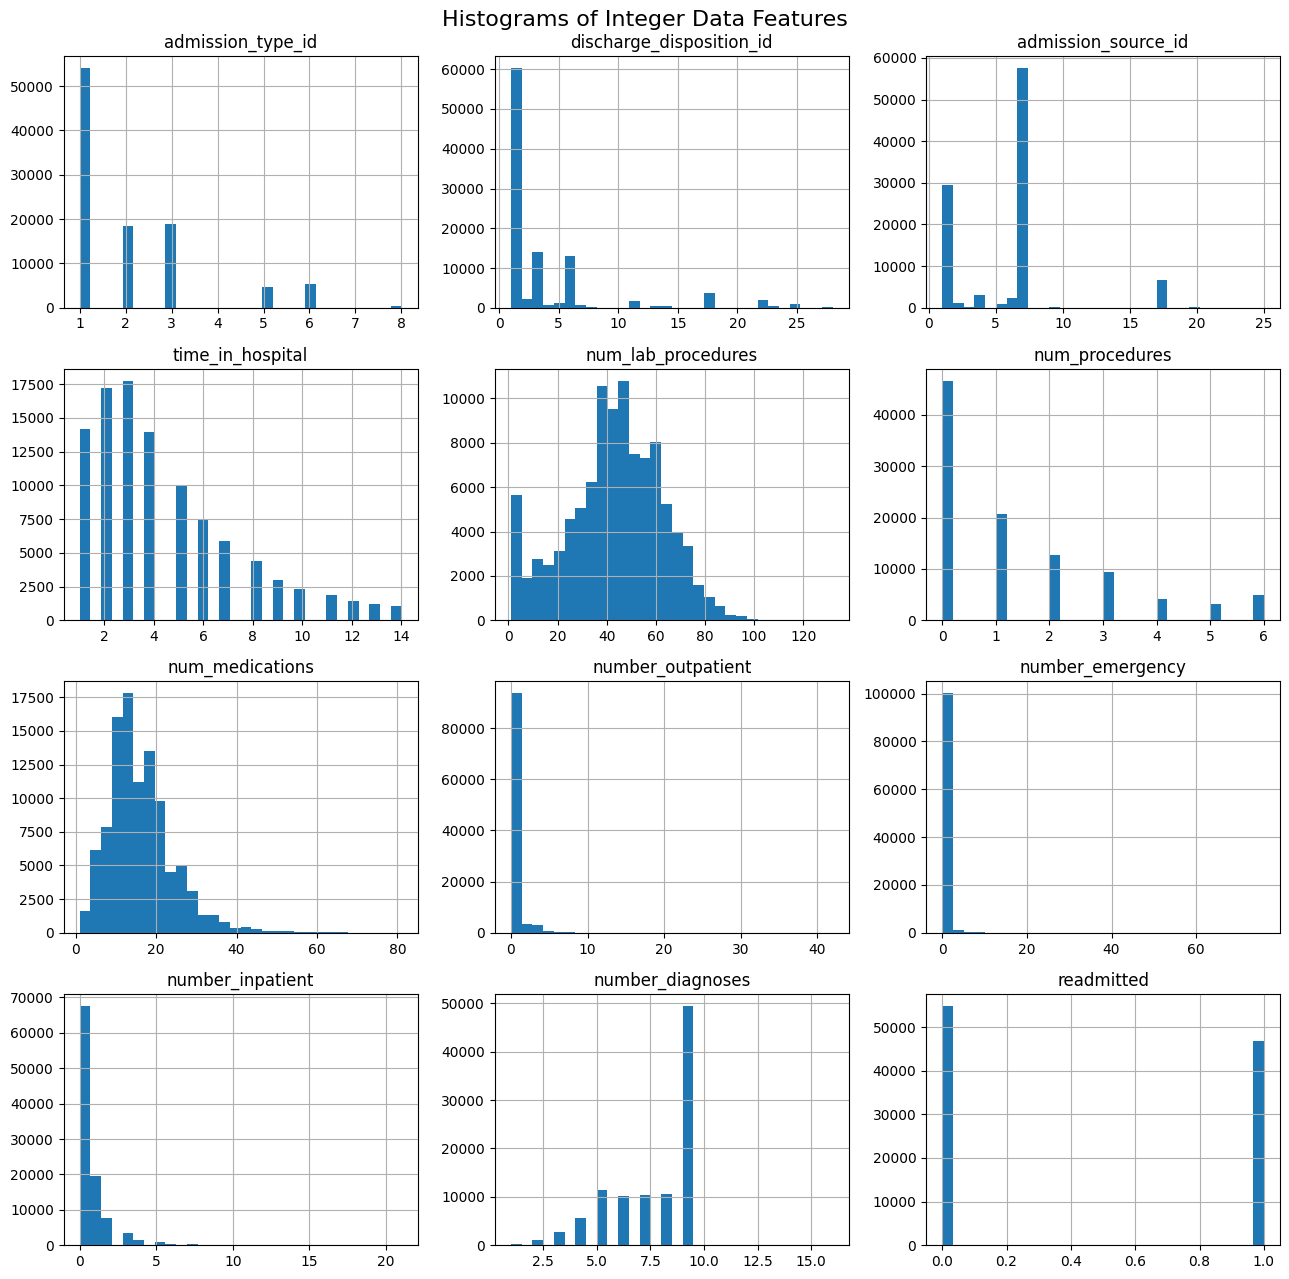

In [16]:
# Plot histogram for integer data features
df.hist(bins=30, figsize=(13, 13)) 
plt.suptitle('Histograms of Integer Data Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

**Right-Skewness**: the features *number_outpatient*, *number_emergency*, *number_inpatient*, and *discharge_disposition_id* are highly skewed to the right, which is expected on medical data where most patients have low values, and a few have very high values. However, these histograms reveal some interesing outliers that could be related to readmission within or after the first 30 days of discharge, which makes sense, given what these features represent:

- *number_outpatient*: number of outpatient visits of the patient in the year preceding the encounter.
- *number_emergency*: number of emergency visits of the patient in the year preceding the encounter.
- *number_inpatient*: number of inpatient visits of the patient in the year preceding the encounter.
- *discharge_disposition_id*: integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available.

**Normal Distribution**: *num_lab_procedures* and *num_medications* showed approximately normal distribution, suggesting theses values oscillate around in a predictable pattern around the mean and mode.

However the histograms of *admission_type_id*, *admission_source_id* and *number_diagnose*s do not reflect at first sight something relevant.

### 4.3. Multivariate Analysis: Feature Relationships and Correlations

Having examined individual variables, we now explore the relationships between them and the target. We examine the distribution of readmission across numerical features, specially looking for higher or lower mean, wider or shorter interquantile range and the density of outliers along our plots. This can potentially guide feature selection and engineering for predictive modeling.

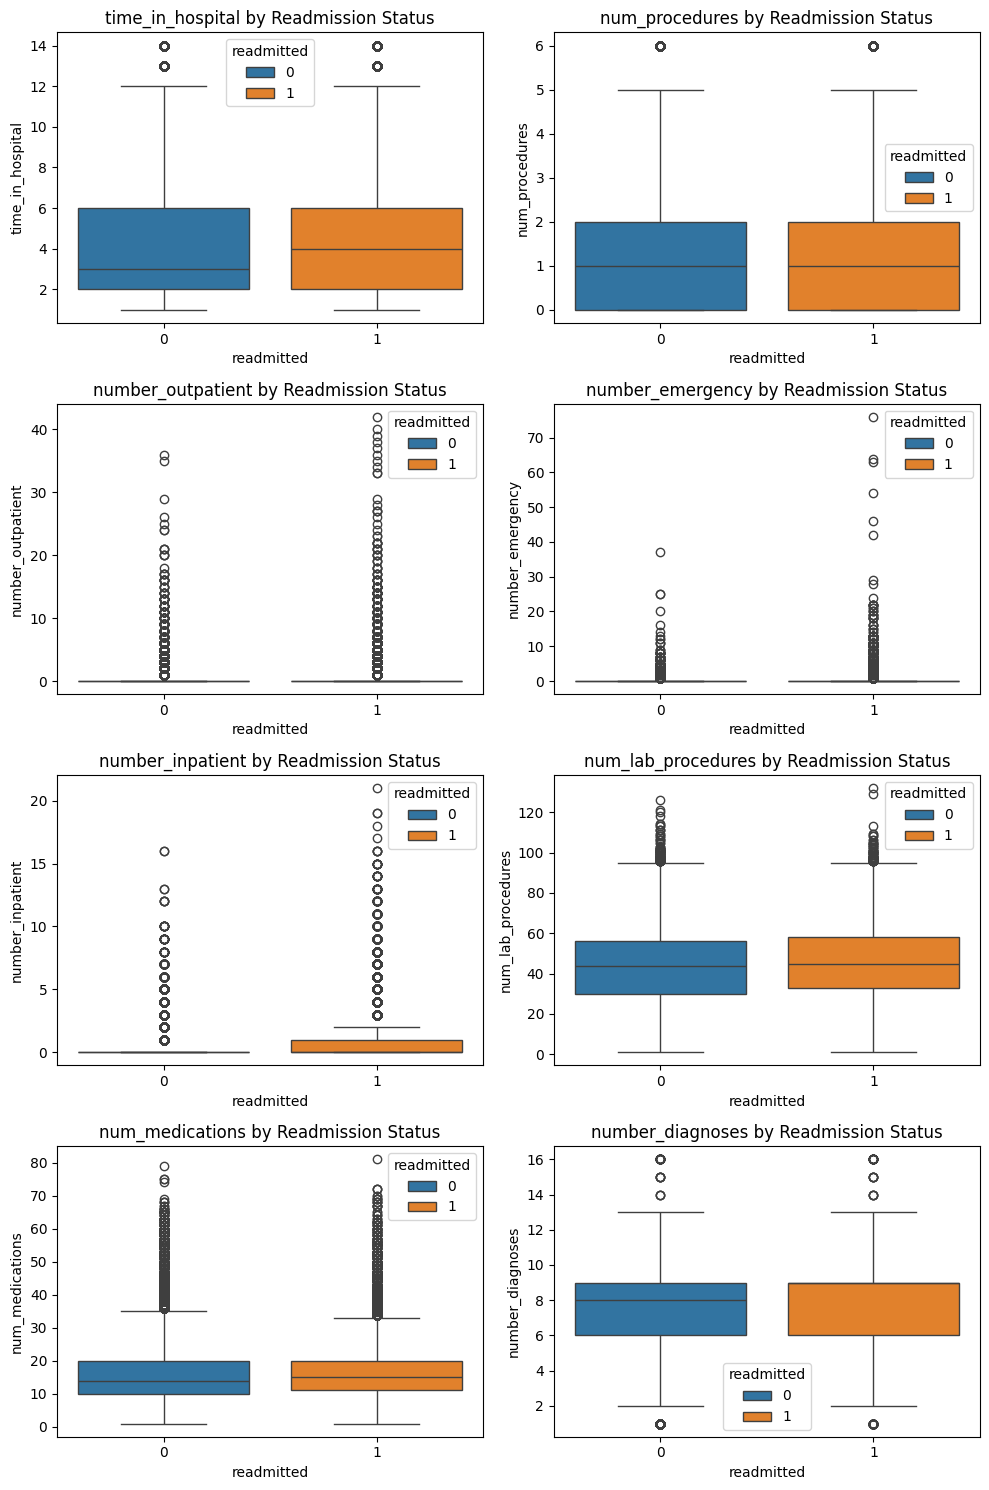

In [17]:
# Create a grid for multiple features
fig, axes = plt.subplots(4, 2, figsize=(10, 15))
features_to_plot = [
    'time_in_hospital',
    'num_procedures',
    'number_outpatient',
    'number_emergency',
    'number_inpatient',
    'num_lab_procedures',
    'num_medications',
    'number_diagnoses'
]

# Creating Boxplots for numerical features
for i, feature in enumerate(features_to_plot):
    row, col = i // 2, i % 2  # Calculate grid position
    sns.boxplot(
        data=df,
        x='readmitted',
        y=feature,
        ax=axes[row, col],
        hue="readmitted"
    )
    axes[row, col].set_title(f'{feature} by Readmission Status')

plt.tight_layout()
plt.show()

From these boxplots we can see a wider interquartile range in the *number_inpatient*, meaning that more values lying in that range are positive. In addition, for *time_in_hospital* the average time in the hospital is greater for positive patients, and for *number_of_diagnoses*  the average number of diagnoses entered to the system is also greater for the positive class.

Hence, these observations suggest that *number_inpatient*, *time_in_hospital*, *number_of_diagnoses* may be more related to our target than the others, and could potentially be important to predict readmission within or after 30 days of discharge. The other features, while they might be a slightly related to our target, according to the boxplot they do not seem to have any meaningful information, it is almost as we had the same plot for positive and negatives, almost no difference in interquantile range, almost the same average value. In spite of that, they still may have some non-linear relationship to our target, we do not delete them hoping our models can catch this relationship.

In addition, the data shows only minimal correlation between features, with the strongest values below 0.5, meaninig that our features are largely independent of each other, and no obvious redundant patterns exist in the data. This also suggests low multicollinearity, which is favorable for model stability and interpretability.

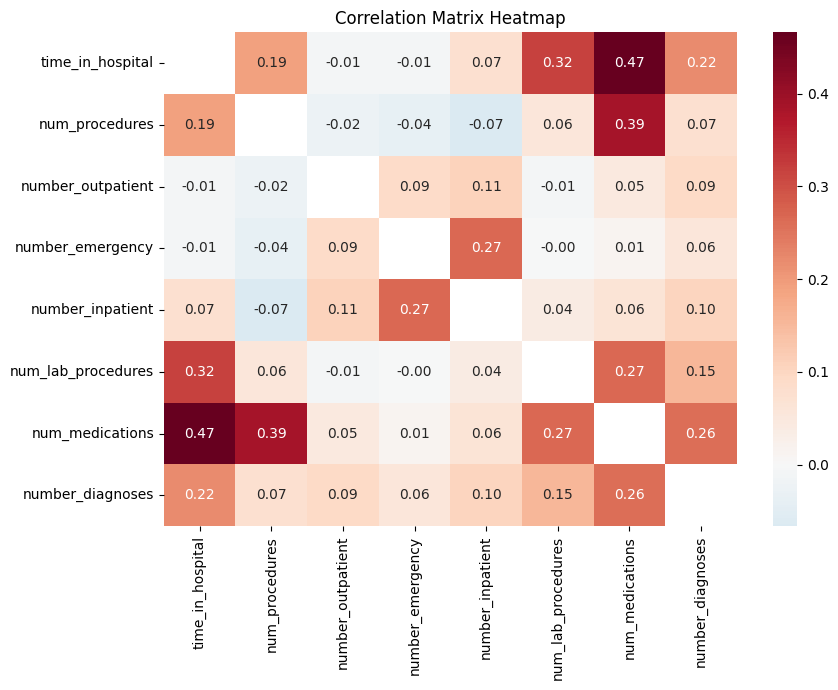

In [18]:
# Calculate the correlation matrix
corr_matrix = df[features_to_plot].corr()

# Create a mask that is True only on the diagonal
mask = np.eye(corr_matrix.shape[0], dtype=bool) # Creates an identity matrix

# Plot correlation matrix
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap='RdBu_r',
    center=0,
    fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

Next, we take a look at some categorical features (*discharge_disposition_id*, *admission_type_id*, and *admission_source_id*) with a concerning amount of categories, simplyfing these would reduce the noise in our model. The stretegy is to keep the top categories with more counts, first we check the number of counts for each category, then select top 5-7 categories in each of the features, dropping the rows that belong to the other categories, which amounts to about 5% of the total data.

In [19]:
df['discharge_disposition_id'].value_counts()

discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

In [20]:
# We keep about 95% of the data, reducing the number of categories
df = df[df['discharge_disposition_id'].isin([1, 3, 6, 18, 2, 22])] 

In [21]:
df.admission_type_id.value_counts()

admission_type_id
1    50371
3    18216
2    17456
5     4418
6     4099
8      314
7       18
4       10
Name: count, dtype: int64

In [22]:
# We reduce the number of categories, keeping most data 
df = df[df['admission_type_id'].isin([1, 2, 3, 5, 6])] 

In [23]:
df.admission_source_id.value_counts()

admission_source_id
7     53422
1     27888
17     5964
4      3008
6      2014
2      1000
5       769
3       178
20      157
9       124
8        11
22       11
10        8
11        2
25        2
14        1
13        1
Name: count, dtype: int64

In [24]:
# We reduce the number of categories, keeping most data
df = df[df['admission_source_id'].isin([7, 1, 17, 4,
                                        6, 2, 5])]

### 4.4. Feature Engineering: Grouping & Creating Predictive Variables

Next, we are going to transform most of our features, binary features will be converted to 0 and 1 values, and multi-category features will be grouped, mapped or both, from integer codes to categories. Below we find a overview of our current features with their respective categories.

In [25]:
# Print count of values for each feature
for column in df.columns:
    print("Column name:", df[column].value_counts(), 
          "\n|||||||||||||||||||||||||||||||||")

Column name: race
Caucasian          70369
AfricanAmerican    17705
Hispanic            1944
Other               1407
Asian                610
Name: count, dtype: int64 
|||||||||||||||||||||||||||||||||
Column name: gender
Female             50631
Male               43431
Unknown/Invalid        3
Name: count, dtype: int64 
|||||||||||||||||||||||||||||||||
Column name: age
[70-80)     24053
[60-70)     21063
[50-60)     16127
[80-90)     15462
[40-50)      9079
[30-40)      3549
[90-100)     2405
[20-30)      1534
[10-20)       646
[0-10)        147
Name: count, dtype: int64 
|||||||||||||||||||||||||||||||||
Column name: admission_type_id
1    50282
3    18078
2    17192
5     4418
6     4095
Name: count, dtype: int64 
|||||||||||||||||||||||||||||||||
Column name: discharge_disposition_id
1     59675
3     13893
6     12790
18     3609
2      2112
22     1986
Name: count, dtype: int64 
|||||||||||||||||||||||||||||||||
Column name: admission_source_id
7     53422
1     27888
17     

As a first step, we create a new variable with the midpoints values of age, and perform some feature engineering, in particular, we transform diag_1, diag_2, and diag_3 to the corresponding ICD-9 codes clinical category, and we create a new feature from metformin, glimepiride, glipizide, glyburide, pioglitazone, rosiglitazone and insulin, this new feature will count the administered diabetic medications, indicating 0 if the corresponding medication was not administered, else 1:

In [26]:
# Mapping to numeric values
df = df[df['gender'] != 'Unknown/Invalid']
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df["age_num"] = df["age"].map({
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45, 
    '[50-60)': 55,
    '[60-70)' :65,
    '[70-80)': 76,
    '[80-90)': 85,
    '[90-100)': 95
})
df['change'] = df['change'].map({'No': 0, 'Ch': 1})
df['diabetesMed'] = df['diabetesMed'].map({'No': 0, 'Yes': 1})


# Filling a few missing values
df['race'] = df['race'].fillna('Unknown')
df['diag_1'] = df['diag_1'].fillna('Unknown')
df['diag_2'] = df['diag_2'].fillna('Unknown')
df['diag_3'] = df['diag_3'].fillna('Unknown')

# List of diabetes medications
diabetes_med_columns = [
    'metformin',
    'glimepiride',
    'glipizide',
    'glyburide',
    'pioglitazone',
    'rosiglitazone', 
    'acarbose',
    'nateglinide',
    'repaglinide',
    'glyburide-metformin',
    'insulin'
]
# Count the number of diabetic medications if administered
df['number_medications'] = (df[diabetes_med_columns] != 'No').sum(axis=1)
df.drop(columns=diabetes_med_columns, inplace=True)

Next, we are going to map *diag_1*, *diag_2* and *diag_3* from the icd-9 code to the corresponding clinical category, according to the International Statistical Classification of Diseases and Related Health Problems

| ICD-9 code         | Clinical Category |
|------------------|---------|
|**001–139** | infectious and parasitic diseases|
|**140–239** | neoplasms|
|**240–279** | endocrine, nutritional and metabolic diseases, and immunity disorders|
|**280–289** | diseases of the blood and blood-forming organs|
|**290–319** | mental disorders|
|**320–389** | diseases of the nervous system and sense organs|
|**390–459** | diseases of the circulatory system|
|**460–519** | diseases of the respiratory system|
|**520–579** | diseases of the digestive system|
|**580–629** | diseases of the genitourinary system|
|**630–679** | complications of pregnancy, childbirth, and the puerperium|
|**680–709** | diseases of the skin and subcutaneous tissue|
|**710–739** | diseases of the musculoskeletal system and connective tissue|
|**740–759** | congenital anomalies|
|**760–779** | certain conditions originating in the perinatal period|
|**780–799** | symptoms, signs, and ill-defined conditions|
|**800–999** | injury and poisoning|
|**E, V** | external causes of injury and supplemental classification|

From the above list, we create a function to map from the ICD-9 code to the matching clinical category

In [27]:
def map_icd9_to_category(icd9_code):
    """
    Maps ICD-9 codes to clinical categories.
    Handles both string and numeric codes, including V and E codes.
    """
    if pd.isna(icd9_code) or icd9_code in ['?', 'NaN', 'NULL', '']:
        return 'Unknown'
    
    # Convert to string to handle both numeric and string inputs
    code_str = str(icd9_code)
    
    # Handle V codes 
    if code_str.startswith('V'):
        return 'Other'
    # Handle E codes
    if code_str.startswith('E'):
        return 'Other'
    
    try:
        # Convert to integer for numeric comparison
        code_num = int(code_str)
    except:
        return 'Other'
    
    # Map to categories based on ICD-9 ranges
    if 1 <= code_num <= 139:
        return 'Infection/Parasites'
    elif 140 <= code_num <= 239:
        return 'Neoplasms'
    elif 240 <= code_num <= 249:
        return 'Endocrine/Metabolic/Immunity'
    elif code_num == 250 or code_str.startswith('250.'):
        return 'Diabetes'
    elif 251 <= code_num <= 279:
        return 'Endocrine/Metabolic/Immunity'
    elif 280 <= code_num <= 289:
        return 'Blood'
    elif 290 <= code_num <= 319:
        return 'Mental'
    elif 320 <= code_num <= 389:
        return 'Nervous'
    elif 390 <= code_num <= 459 or code_num == 785:
        return 'Circulatory'
    elif 460 <= code_num <= 519 or code_num == 786:
        return 'Respiratory'
    elif 520 <= code_num <= 579 or code_num == 787:
        return 'Digestive'
    elif 580 <= code_num <= 629:
        return 'Genitourinary'
    elif 680 <= code_num <= 709:
        return 'Skin'
    elif 710 <= code_num <= 739:
        return 'Musculoskeletal'
    elif 740 <= code_num <= 759:
        return 'Congenital'
    elif 760 <= code_num <= 779:
        return 'Perinatal'
    elif 780 <= code_num <= 799:
        return 'Symptoms'
    elif 800 <= code_num <= 999:
        return 'Injury'
    else:
        return 'Other'

Then, we apply this mapping to the diagnostics features

In [28]:
# Define the diagnosis columns to transform
diag_columns = ['diag_1', 'diag_2', 'diag_3']

# Apply the mapping function to each diagnosis column
for col in diag_columns:
    df[col] = df[col].apply(map_icd9_to_category)

However, when trying to predict readmission, the most important clues are the health problems directly caused by diabetes. The biggest red flag is, obviously, a Diabetes diagnosis itself. Next, Circulatory issues, because diabetes is really hard on the heart and blood vessels. Also extremely important are Genitourinary problems, since diabetes is the top cause of kidney failure. Finally, Endocrine/Metabolic/Immunity issues, as this category includes dangerous diabetic emergencies. Hence, creating a new feature, that regards the aforementioned categories could potentially improve the predictive power of our models:

In [29]:
# List of medical conditions related to diabetes
related_conditions = [
    'Diabetes',
    'Circulatory',
    'Genitourinary',
    'Endocrine/Metabolic/Immunity'
]

# Check which of the three diagnoses are diabetic-related
is_diabetic_condition = df[['diag_1', 'diag_2', 'diag_3']].isin(related_conditions)

# Create a new column that counts the number of diabetic conditions per patient
df['diabetic_conditions'] = is_diabetic_condition.sum(axis=1)

# Droping all other columns to not introduce noise
df.drop(columns=['diag_1', 'diag_2', 'diag_3'], inplace=True)

now we have a feature that comprises the diagnosed conditions that are highly related to diabetes.

Proceeding with **admission_source_id**, **admission_type_id** and **discharge_disposition_id**, these are categorical features where each category is represented by a integer, previously we reduced significantly the number of categories for each column, now we are going to map and group similar categories in each column. The following describes each category's meaning:

| admission_type_id | category     |
|-------------------|-----------------|        
| 1                 | Emergency |        
| 2                 | Urgent |        
| 3                 | Elective |             
| 5, 6              | Unknown |                

| discharge_disposition_id | category |
|--------------------------|-------------|
| 1 | Home |
| 2 | Hospital |
| 3 | SNF |
| 6 | HomeService |
| 18 | Unknown |
| 22 | Rehab|

| admission_source_id | category |
|---------------------|-------------|
| 1 | Physician_referral |
| 2 | Clinic_referral |
| 4 | Hospital |
| 5 | SNF |
| 6 | OtherHCF |
| 7 | Emergency Room |
| 17 | Unknown |

This grouping schema preserves the clinical intent of the original categorization. We will now proceed to assign each number its corresponding category according to the tables above

In [30]:
# Mapping admission types
df['admission_type_id'] = df['admission_type_id'].map({
    1: 'Emergency',
    2: 'Urgent',
    3: 'Elective',
    5: 'Unknown',
    6: 'Unknown'
})

# Mapping discharge dispositions
df['discharge_disposition_id'] = df['discharge_disposition_id'].map({
    1: 'Home',
    2: 'Hospital',
    3: 'SNF',
    6: 'HomeService',
    18: 'Unknown',
    22: 'Rehab'
})

# Mapping admission sources
df['admission_source_id'] = df['admission_source_id'].map({
    1: 'Physician_referral',
    2: 'CLinic_referral',
    4: 'Hospital',
    5: 'SNF',
    6: 'OtherHCF',
    7: 'Emergency Room',
    17: 'Unknown'
})

Finally, we check our data has the correct data type, every column should be either "category" or "int64" type in order to be processed correctly

In [31]:
# Changing data types
df['readmitted'] = df['readmitted'].astype('category')
df['admission_type_id'] = df['admission_type_id'].astype('category')
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype('category')
df['admission_source_id'] = df['admission_source_id'].astype('category')

# Checking al data types are either 'category' or 'int64', else change it
for column in df.columns:
    dtype = df[column].dtype
    if dtype == 'object':
        df[column] = df[column].astype('category')
    if dtype == 'float64':
        df[column] = df[column].astype('int64')

 Now, our data is ready to be standarized and one-hot encoded, it has no null values, have two data types, categoricals properly grouped, and numericals as integers.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94062 entries, 1 to 101765
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   race                      94062 non-null  category
 1   gender                    94062 non-null  int64   
 2   age                       94062 non-null  category
 3   admission_type_id         94062 non-null  category
 4   discharge_disposition_id  94062 non-null  category
 5   admission_source_id       94062 non-null  category
 6   time_in_hospital          94062 non-null  int64   
 7   num_lab_procedures        94062 non-null  int64   
 8   num_procedures            94062 non-null  int64   
 9   num_medications           94062 non-null  int64   
 10  number_outpatient         94062 non-null  int64   
 11  number_emergency          94062 non-null  int64   
 12  number_inpatient          94062 non-null  int64   
 13  number_diagnoses          94062 non-null  int64   

### 4.5. Constructing a Preprocessing Pipeline

Our columns can be divided into two different data types, numerical variables benefit from feature scaling to ensure consistent magnitude across all features, while categorical variables require encoding to convert them into a numerical format that machine learning algorithms can process effectively.

In [33]:
# Select categorical features
cat_columns = df.select_dtypes(include="category").columns
categorical_features = cat_columns.drop('readmitted').to_list()

# Choose numerical features
numerical_features = df.select_dtypes(include="int64").columns.to_list()

print("Numerical features: ", numerical_features)
print("\nCategorical features: ", categorical_features)

Numerical features:  ['gender', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'change', 'diabetesMed', 'age_num', 'number_medications', 'diabetic_conditions']

Categorical features:  ['race', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']


We set up a preprocessing pipeline using scikit-learn's Pipeline and ColumnTransformer to systematically apply feature scaling and one-hot encoding to numerical and categorical features respectively, automating the entire preprocessing workflow.

In [34]:
# Scale the numeric features
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

# One-hot encode the categoricals 
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
)

#Construct a column transformer object
preprocessor= ColumnTransformer(
    transformers=[("num", numeric_transformer, numerical_features),
                  ("cat", categorical_transformer, categorical_features)]
)

## 5. Modeling & Evaluation: Algorithm Development and Tuning

This section outlines the process of training, optimizing, and evaluating predictive models to identify patients at risk of readmission. We compare three distinct classifiers: Logistic Regression, Random Forest, and LightGBM. To ensure a robust comparison, we implement a structured tuning strategy:

* Data Preprocessing: For Logistic Regression and Random Forest, a pipeline automatically handles feature preprocessing for numerical and categorical variables. The LightGBM model, capable of handling raw categorical data, is trained without this step.

* Hyperparameter Tuning: Optimal parameters for each model are identified using a grid search or a randomized search strategy, optimizing for **average precision** to prioritize the accurate identification of readmission cases.

* Evaluation: Final model performance is assessed on a holdout test set. We report key metrics including accuracy and a full classification report to evaluate overall performance and class-wise precision/recall.

To avoid retraining our models in every executions we implement functions to save and load them.

In [35]:
def save_model(model, filename):
    """Save a scikit-learn model"""
    try:
        joblib.dump(model, filename)
        print(f"Model saved successfully as {filename}")
        return True
    except Exception as e:
        print(f"Error saving model: {e}")
        return False

def load_model(filename):
    """Load a scikit-learn model"""
    try:
        if not os.path.exists(filename):
            raise FileNotFoundError(f"Model file {filename} not found")
        
        model = joblib.load(filename)
        print(f"Model loaded successfully from {filename}")
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

We will split the data into training and test sets. To enhance model robustness, we will then perform 10-fold cross-validation with shuffling on the training set.

In [36]:
# Create dataframe X comprising only the features and target vector y
X = df[df.copy().columns.drop("readmitted")]
y = df.readmitted

# Split the data into train/test sets, using stratification 
# to maintain class distribution of our target in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.10,
    stratify=y,
    random_state=25)

# Initiate cross-validation k-fold shuffling our data 
# to reduce variance in the cross-validation scores
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=25)

### 5.1. Logistic Regression Model Implementation

Logistic regression serves as a strong baseline for our binary classification task precisely because it assumes a linear relationship between the features and the target. If subsequent, more powerful models (capable of capturing non-linearity) fail to outperform this baseline, it would imply that the available features have a primarily linear relationship with the outcome, or that we lack the features necessary to model the underlying non-linear patterns, highlighting a need for improved data acquisition or preprocessing.

First, we implement a pipeline to handle the preprocessing step, and carry out a grid search on a Logistic regression classifier. 

In [37]:
model_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(random_state=25))
    ]
)

Our grid search configuration tunes a logistic regression model with ElasticNet regularization. The goal is to find the ideal balance between L1 (Lasso) and L2 (Ridge) regularization and its overall strength, optimizing for model performance and good generalization.

In [38]:
param_grid_lr = {
    # Solver and Penalty Type (Fixed for this grid)
    'classifier__solver': ['saga'],
    'classifier__penalty': ['elasticnet'],
    
    # ElasticNet Mixing Parameter
    'classifier__l1_ratio': [0.25, 0.5, 0.75],
    
    # Regularization Strength and Class Balancing
    'classifier__class_weight': ['balanced'],
    'classifier__C': [0.1, 1.0], # Inverse of regularization strength
    
    # Training Iterations
    'classifier__max_iter': [1500] # Ensure convergence
}

For better performance we employ stratified cross-validation with 10-folds, in addition, our chosen scoring strategy is average precision as our primary metric, since our aim is to effectively predict whether a patient will be readmitted or not

In [39]:
model_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid_lr, 
    cv=cv, # Using stratified cross-validation
    scoring="average_precision", # Optimize training for average precision
    n_jobs=-1, # In order to use all cores in our local machine
    verbose=0
)

Next, our code manages to train or load a linear regression model by first asking the user which action to carry out. If train is passed, a new model is trained, printing best cross-validation score  and best parameters, then the best model is saved for future use. If load is passed, it first attempts to load a pre-trained logistic regression model from a file for immediate use; if the file isn’t found, it automatically switches to training a new model using a grid search to find the best hyperparameters and saves that newly trained model for future use. Finally it evaluates whichever model was loaded or trained on a test dataset to report its accuracy.

In [40]:
# Model Management: Train or Load
while True:
    ans = input("Logistic Regression: Train a new model or "
                "load a saved one? (train/load) ").strip().lower()
    if ans in ('train', 'load'):
        break
    else:
        print("Please enter either 'train' or 'load'.")

# Initialize the variable to avoid NameError later
lr_model = None 

if ans == "load":
    try:
        lr_model = load_model('logistic_regression_model.joblib')
        print("Model loaded successfully!")
        # Print parameters to verify it's the right model
        print("\nLoaded model parameters:")
        for key, value in lr_model.get_params().items():
            # Only show relevant pipeline params
            if 'classifier__' in key:  
                print(f"  {key}: {value}")
    except FileNotFoundError:
        print("Error: Saved model file not found",
              "Please train a new model.")
        # After error, set the flow to 'train'
        ans = 'train'

# If we are training (either by choice or because load failed)
if ans == "train":
    print(
        "Fitting Logistic Regression model...",
          "(This may take a while)"
    )
    model_search.fit(X_train, y_train)
    
    lr_best_params = model_search.best_params_
    print("\nBest parameters found: ", lr_best_params)
    lr_best_score = model_search.best_score_
    print("Best cross-validation score: {:.2f}".format(lr_best_score))
    
    # Save the best model
    save_model(
        model_search.best_estimator_, # Save the best_estimator_
        'logistic_regression_model.joblib') 
    print("Model saved successfully.")
    # Use the best estimator directly
    lr_model = model_search.best_estimator_  

# Test the Model if available
if lr_model is not None:
    score = lr_model.score(X_test, y_test)
    print(f"\nFinal Model Test Accuracy: {score:.2f}")
else:
    print("Error: No model is available to test.")

Logistic Regression: Train a new model or load a saved one? (train/load)  load


Model loaded successfully from logistic_regression_model.joblib
Model loaded successfully!

Loaded model parameters:
  estimator__classifier__C: 1.0
  estimator__classifier__class_weight: None
  estimator__classifier__dual: False
  estimator__classifier__fit_intercept: True
  estimator__classifier__intercept_scaling: 1
  estimator__classifier__l1_ratio: None
  estimator__classifier__max_iter: 100
  estimator__classifier__multi_class: auto
  estimator__classifier__n_jobs: None
  estimator__classifier__penalty: l2
  estimator__classifier__random_state: 25
  estimator__classifier__solver: lbfgs
  estimator__classifier__tol: 0.0001
  estimator__classifier__verbose: 0
  estimator__classifier__warm_start: False

Final Model Test Accuracy: 0.65


Test accuracy is around 0.65. A classification report is included to provide a more detailed breakdown of the model's performance, including metrics like precision and recall per class.

In [41]:
y_pred_lr = lr_model.predict(X_test)
print("Classification Report of logistic regression model:")
print(classification_report(y_test, y_pred_lr))

Classification Report of logistic regression model:
              precision    recall  f1-score   support

           0       0.63      0.69      0.66      4976
           1       0.61      0.55      0.58      4431

    accuracy                           0.62      9407
   macro avg       0.62      0.62      0.62      9407
weighted avg       0.62      0.62      0.62      9407



This report shows the logistic regression model's performance is okay but not great, its overall scores indicate its predictions should be considered helpful but not definitive, with a 62% overall accuracy: 

* It's slightly better at predicting class '0', correctly identifying it 69% of the time, than it is at predicting class '1', which it only finds 55% of the time. 

* When the model does predict either class, it's correct about 63% of the time for '0' and 61% for '1'. 

* The fact that the scores for both classes are fairly close suggests the model isn't heavily biased toward one class.

### 5.2. Random Forest Classifier Implementation

We now consider more complex classifiers, such as Random Forest. This model is superior for capturing non-linear relationships and is robust against outliers, irrelevant features, and multicollinearity due to its ensemble approach. Consequently, it generally provides higher predictive accuracy on tabular data, making it ideal for detecting any non-linear patterns within our dataset.

Below we define the parameter grid for optimizing our Random Forest classifier using GridSearchCV. The goal is to explore a practical subset of key hyperparameters that control the complexity and robustness of the model. We focus on parameters that prevent overfitting by limiting tree depth and enforcing minimum sample sizes for splits and leaves. The grid is intentionally kept concise to ensure computational efficiency while still covering important variations in model behavior.

In [42]:
# Define parameter grid for random forest classifier
param_grid_rf = {
    # Controls the number of trees (bias-variance trade-off)
    'classifier__n_estimators': [100, 200],
    # Prevents trees from becoming too complex & overfitting
    'classifier__max_depth': [20, 30],
    # Increases required samples to split, regularizes
    'classifier__min_samples_split': [5, 10],
    # Increases required samples per leaf, regularizes
    'classifier__min_samples_leaf': [2, 4],
    # Default for classification; ensures tree diversity
    'classifier__max_features': ['sqrt']         
    }

As before, our code first prompts the user to train or load a classifier model. If training, it performs a grid search to find the best hyperparameters, we recycle the pipeline employed before but changing the classifier and parameter grid, it then displays the best score and parameters, then saves the model. If loading, it attempts to load a pretrained model; if unavailable, it trains and saves a new one instead. Finally, it evaluates the model on the test set and reports the accuracy.

In [43]:
# Model Management: Train or Load
while True:
    ans = input("Random Forest Classifier: Train a new model or "
                "load a saved one? (train/load) ").strip().lower()
    if ans in ('train', 'load'):
        break
    else:
        print("Please enter either 'train' or 'load'.")

# Initialize the variable to avoid NameError later
rf_model = None 

if ans == "load":
    try:
        rf_model = load_model('random_forest_classifier.joblib')
        print("Random Forest model loaded successfully!")
        # Print parameters to verify it's the right model
        print("\nLoaded model parameters:")
        for key, value in rf_model.get_params().items():
            # Only show relevant pipeline params
            if 'classifier__' in key:  
                print(f"  {key}: {value}")
    except FileNotFoundError:
        print("Error: Saved Random Forest model not found." 
            "Training a new model.")
        ans = 'train'  # After error switch to train mode

if ans == "train":
    # Configure the pipeline and search for Random Forest
    model_pipeline.set_params(
        preprocessor=preprocessor, 
        classifier=RandomForestClassifier(random_state=25)
    )
    
    model_search.estimator = model_pipeline
    model_search.param_grid = param_grid_rf
    
    # Train the model
    print("Fitting Random Forest classifier...")
    model_search.fit(X_train, y_train)
    
    # Report results
    rf_best_params = model_search.best_params_
    print("\nBest parameters found: ", rf_best_params)
    rf_best_score = model_search.best_score_
    print("Best cross-validation score: {:.2f}".format(rf_best_score))
    
    save_model(model_search.best_estimator_, # Save and store the best model
               'random_forest_classifier.joblib')
    print("Model saved successfully.")
    # Use the best estimator directly
    rf_model = model_search.best_estimator_  

# Test the model if available
if rf_model is not None:
    score = rf_model.score(X_test, y_test)
    print(f"\nRandom Forest Test Accuracy: {score:.2f}")
else:
    print("Error: No Random Forest model is available to test.")

Random Forest Classifier: Train a new model or load a saved one? (train/load)  load


Model loaded successfully from random_forest_classifier.joblib
Random Forest model loaded successfully!

Loaded model parameters:
  estimator__classifier__bootstrap: True
  estimator__classifier__ccp_alpha: 0.0
  estimator__classifier__class_weight: None
  estimator__classifier__criterion: gini
  estimator__classifier__max_depth: None
  estimator__classifier__max_features: sqrt
  estimator__classifier__max_leaf_nodes: None
  estimator__classifier__max_samples: None
  estimator__classifier__min_impurity_decrease: 0.0
  estimator__classifier__min_samples_leaf: 1
  estimator__classifier__min_samples_split: 2
  estimator__classifier__min_weight_fraction_leaf: 0.0
  estimator__classifier__monotonic_cst: None
  estimator__classifier__n_estimators: 100
  estimator__classifier__n_jobs: None
  estimator__classifier__oob_score: False
  estimator__classifier__random_state: 25
  estimator__classifier__verbose: 0
  estimator__classifier__warm_start: False

Random Forest Test Accuracy: 0.66


Test accuracy is around 0.66, slightly better than our logistic regression model. A classification report is included to provide a more detailed breakdown of the model's performance, including metrics like precision and recall per class.

In [44]:
y_pred_rf = rf_model.predict(X_test)
print("Classification Report of random forest model:")
print(classification_report(y_test, y_pred_rf))

Classification Report of random forest model:
              precision    recall  f1-score   support

           0       0.64      0.72      0.68      4976
           1       0.63      0.55      0.59      4431

    accuracy                           0.64      9407
   macro avg       0.64      0.63      0.63      9407
weighted avg       0.64      0.64      0.63      9407



The Random Forest model outperforms the Logistic Regression model, achieving a higher overall accuracy (0.64 vs. 0.62). It shows stronger performance for both classes, with improved precision and recall for class 0 (F1-score: 0.68 vs. 0.66) and higher precision for class 1 (0.63 vs. 0.61), while maintaining the same recall for that class. Consequently, both the macro and weighted average F1-scores are higher for the Random Forest (0.63), confirming a better and more balanced predictive capability across the dataset.

### 5.3. Light Gradient Boosting Machine (LGBM) Classifier Implementation

Based on the previous results from the logistic regression and random forest models, it is evident that neither approch yielded significant improvements in our performance metrics for either binary class. This suggests there may not be a strong linear or non-linear relationship between the features and the target.
Given thos findings, we will shift our strategy towards a more efficient and scalable approach. We will use a LGBM classifier, a faster and more efficient gradient boosting framework, to explore a wider hyperparameter space. By employing random search across 100 different configurations, we aim to identify the most robust model possible under theses constraints.

Below we define the parameter grid for tunning our LGBM classifier using RandomizedSearchCV. Our goal is to explore a wide range of key hyperparameters that control the complexity and robustness of the model. We focus on parameters that prevent overfitting by limiting tree depth, medium to higher number of leaves, wide number of samples in leaf node, wide fraction of samples for tree training, and weaker to medium L1 and L2 regularization. The grid is intentionaly more complex to ensure robustness and a well-regularized model configuration.

In [45]:
# Define parameter distributions for RandomizedSearchCV
param_distributions = {
    # Shrinks the contribution of each tree to prevent overfitting.
    # Lower values make the model more robust but require more trees.
    'learning_rate': np.logspace(-3, -1, 100), # Range: 0.001 to 0.1

    # The maximum depth of a tree. -1 indicates no limit.
    # Deeper trees can model more complex patterns but overfit more easily.
    'max_depth': [-1, 3, 5, 7, 9],

    # The maximum number of leaves in one tree.
    # A primary controller of model complexity. Higher values mean more complex trees.
    'num_leaves': [15, 31, 63, 127, 255],

    # The minimum number of data points required in a leaf node.
    # Higher values regularize the model and prevent overfitting to noise.
    'min_child_samples': [5, 10, 20, 40, 60, 100],

    # The fraction of samples (rows) used for training each tree.
    # Sub-sampling helps prevent overfitting and speeds up training.
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],

    # The fraction of features (columns) used for training each tree.
    # Feature sub-sampling increases diversity between trees and reduces overfitting.
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],

    # L1 regularization term on weights. Higher values push feature weights toward zero.
    # Can be used for feature selection and to handle correlated features.
    'reg_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1.0],

    # L2 regularization term on weights. Penalizes large weights to smooth the model.
    # Generally makes the model more conservative and robust.
    'reg_lambda': [0, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0],
}

As before, to train or load our LGBM classifier, we first prompt the user to choose between training a new model or loading an existing one. If training is selected, we perform a randomized hyperparameter search using a parameter grid tailored for LightGBM. Since LightGBM handles categorical features natively, we avoid one-hot encoding and simply pass them through directly. Numerical features remain unscaled, as tree-based models are not sensitive to feature magnitudes. After the search, we display the best cross-validation score and corresponding hyperparameters, then save the trained model. If loading is chosen, the system attempts to load a pre-trained model; if none exists, it falls back to training a new model. Finally, the model is evaluated on the test set, and classification accuracy is reported.

In [46]:
# Model Management: Train or Load
while True:
    ans = input("LGBM Classifier: Train a new model or "
                "load a saved one? (train/load) ").strip().lower()
    if ans in ('train', 'load'):
        break
    else:
        print("Please enter either 'train' or 'load'.")

# Initialize the variable to avoid NameError later
lgbm_model = None

if ans == "load":
    try:
        lgbm_model = load_model('lgbm_classifier.joblib')
        print("LGBM model loaded successfully!")
        # Print key parameters for verification
        print("\nKey model parameters:")
        loaded_params = lgbm_model.get_params()
        for key in ['learning_rate', 'max_depth', 
                    'num_leaves', 'n_estimators']:
            if key in loaded_params:
                print(f"  {key}: {loaded_params[key]}")
                
    except FileNotFoundError:
        print("Error: Saved LGBM model not found. Training a new model.")
        ans = 'train'  # Switch to train mode

if ans == "train":
    # Initialize the base model with strong default regularization
    model_lgbm = LGBMClassifier(
        random_state=42,
        class_weight='balanced',  # Handles imbalance
        n_estimators=2000,       # Set high for potential early stopping
        boosting_type='gbdt',    # Standard gradient boosting
        extra_trees=False,
    )
    
    # Create RandomizedSearchCV object
    random_search = RandomizedSearchCV(
        estimator=model_lgbm,
        param_distributions=param_distributions,
        n_iter=100,
        cv=cv,
        scoring="average_precision",
        n_jobs=-1,
        verbose=3,
        random_state=42,
        refit=True
    )
    
    # Fit the model
    print("Starting Randomized Search for LGBM...")
    random_search.fit(X_train, y_train)
    
    # Print the results
    print("\nRandomized Search Complete!")
    print(f"Best Average Precision Score: {random_search.best_score_:.2f}")
    print("Best Parameters:")
    for param, value in random_search.best_params_.items():
        print(f"{param}: {value}")
    
    # Save and store the best model
    save_model(random_search.best_estimator_, 'lgbm_classifier.joblib')
    print("Model saved successfully.")
    lgbm_model = random_search.best_estimator_  # Use directly

# Test the model if available
if lgbm_model is not None:
    test_score = lgbm_model.score(X_test, y_test)
    print(f"\nLGBM Test Accuracy: {test_score:.2f}")

LGBM Classifier: Train a new model or load a saved one? (train/load)  load


Model loaded successfully from lgbm_classifier.joblib
LGBM model loaded successfully!

Key model parameters:
  learning_rate: 0.006734150657750821
  max_depth: 9
  num_leaves: 63
  n_estimators: 2000

LGBM Test Accuracy: 0.64


Test accuracy is around 0.64, the same as our logistic regression model and less than our random forest classifier. A classification report is included to provide a more detailed breakdown of the model's performance, including metrics like precision and recall per class.

In [47]:
y_pred_lgbm = lgbm_model.predict(X_test)
print("Classification Report of LGBM classifier:")
print(classification_report(y_test, y_pred_lgbm))

Classification Report of LGBM classifier:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      4976
           1       0.62      0.62      0.62      4431

    accuracy                           0.64      9407
   macro avg       0.64      0.64      0.64      9407
weighted avg       0.64      0.64      0.64      9407



The LGBM model did not yield the significant performance boost we might have hoped for, however, its main advantage over Random Forest in this case is not accuracy but its superior recall (0.62) for class 1, a significant improvement over previous models (0.55). In a clinical context, where failing to identify a high-risk patient (false negative) is a far more critical error than a false alert (false positive).

Additionally, our LGBM classifier has a better balance between precision and recall for each class (0.66/0.66 for class 0, 0.62/0.62 for class 1), as opposed to logistic regression (0.63/0.69 for class 0, 0.61/0.55 for class 1) and random forest (0.64/0.72 for class 0, 0.63/0.55 for class 1), indicating a more consistent prediction behavior across both classes. However, these results continue to suggest that the underlying relationship between the features and the target is challenging to model effectively.

## 6. Model Selection & Final Evaluation

### 6.1. Comparative Performance of Models

While the classification report provided performance metrics for the Logistic Regression, Random Forest, and LGBM Classifier models, the confusion matrices offer a deeper insight into their predictive behavior. By comparing the distribution of true positives, true negatives, false positives, and false negatives across all three models, we can confirm that the LGBM Classifier demonstrates superior robustness and overall consistency in classifying both target classes on the holdout dataset.

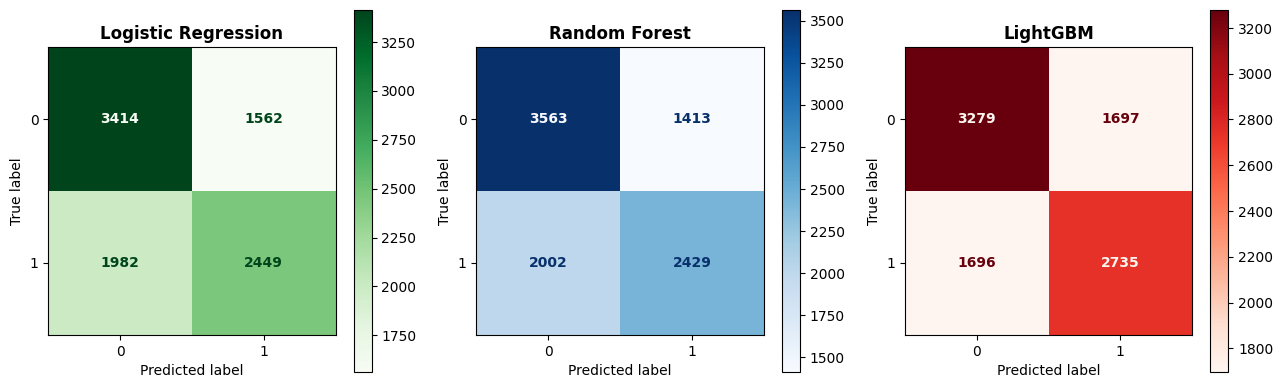

In [48]:
# Create figure with 3 subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Logistic Regression Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(
    conf_matrix_lr, 
    display_labels = lr_model.classes_
)
disp_lr.plot(ax=axes[0], cmap='Greens', values_format='d')
axes[0].set_title("Logistic Regression", 
                  fontsize=12, 
                  fontweight='bold')

# Random Forest Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(
    conf_matrix_rf,
    display_labels = rf_model.classes_
)
disp_rf.plot(ax=axes[1], cmap='Blues', values_format='d')
axes[1].set_title("Random Forest", 
                  fontsize=12,
                  fontweight='bold')

# LightGBM Confusion Matrix
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
disp_lgbm = ConfusionMatrixDisplay(
    conf_matrix_lgbm, 
    display_labels = lgbm_model.classes_
)
disp_lgbm.plot(ax=axes[2], cmap='Reds', values_format='d')
axes[2].set_title("LightGBM",
                  fontsize=12,
                  fontweight='bold')

# Increase text size in all matrices
for ax in axes:
    for text in ax.texts:
        text.set_fontsize(10)  # Increase font size
        text.set_fontweight('bold')  # Make text bold

plt.tight_layout()
plt.show()

As evidenced by the confusion matrices, the LightGBM classifier generally performs slightly better than the other models by correctly identifying more true positives (2735) and fewer false negatives(1696). Although it misclassifies instances of Class 0 slightly more often than both Logistic Regression and Random Forest, it provides a more balanced performance, with a near 1:1 ratio of false negatives to false positives.

### 6.2. ROC Curves

To support our claim that lightGBM has overall better performance we plot all three ROC curves to compare the each model and calculate the area under the curve (AUC). Most classification metrics, such as accuracy, precision, recall, and f1-score given on a classification report, depend on a predetermined threshold (usually 0.5) to transform predicted probabilities into discrete class labels. However the choice of threshold can be changed arbitrarily and greatly affects these metrics. Since ROC-AUC is threshold-invariant, it provides a more reliable metric for identifying the most robust and scalable model among the three.

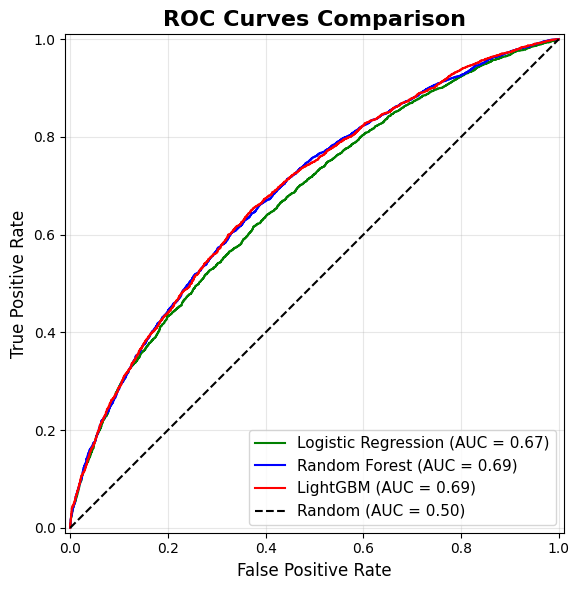

In [49]:
# Create a single figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Plot all ROC curves on the same axis
RocCurveDisplay.from_estimator(
    lr_model, 
    X_test, 
    y_test, 
    ax=ax, 
    color='green', 
    name='Logistic Regression'
)
RocCurveDisplay.from_estimator(
    rf_model, 
    X_test,
    y_test, 
    ax=ax, 
    color='blue', 
    name='Random Forest'
)
RocCurveDisplay.from_estimator(
    lgbm_model, 
    X_test, 
    y_test, 
    ax=ax, 
    color='red', 
    name='LightGBM'
)

# Add random classifier line
ax.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')

# Customize the plot
ax.set_title('ROC Curves Comparison', fontsize=16, fontweight='bold')
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(loc='lower right', fontsize=11)

plt.tight_layout()
plt.show()

As shown in the plot, LightGBM and Random Forest have an identical AUC of 0.69, outperforming Logistic Regression (AUC=0.67). Despite this similar overall performance, the classification report and confusion matrix reveal that LightGBM provides more balanced predictions on unseen data across both classes. Building on this observation, our model's highest performance metrics (ROC-AUC: 0.69, Accuracy: 64%) can be directly contextualized by comparing them to previous studies that used the same benchmark dataset:

- Compared to *Mahmoud et al.* [1]: Our model outperforms their best-reported ROC-AUC (0.65 from Naive Bayes) and performs on par with their highest accuracy (64.5% from SVM).

- Compared to *Munnangi & Chakraborty* [2]: Our model achieves a higher ROC-AUC (0.69 vs. 0.683) and a comparable accuracy (64% vs. 63.4%).

This favorable comparison confirms that our model is not only robust but also ranks among the top-performing models for this specific predictive task.


**References**

1.  Mahmoud, M., Bader, M., & McNicholas, J. (2023). Short-Term and Long-Term Readmission Prediction in Uncontrolled Diabetic Patients using Machine Learning Techniques. In *Proceedings of the 16th International Joint Conference on Biomedical Engineering Systems and Technologies (BIOSTEC 2023) - Volume 5: HEALTHINF* (pp. 680-688). SCITEPRESS - Science and Technology Publications.

2.  Munnangi, H., & Chakraborty, G. (2015). Predicting Readmission of Diabetic Patients using the high performance Support Vector Machine algorithm of SAS® Enterprise Miner™ [Paper 3254-2015]. *Proceedings of the SAS Global Forum 2015 Conference*.

### 6.3. Final Model Selection

After evaluating all three models, LightGBM was selected for its superior performance. The chart below visualizes the most important features identified by the model, using LightGBM's built-in method for calculating feature importances based on the total gain from each split.

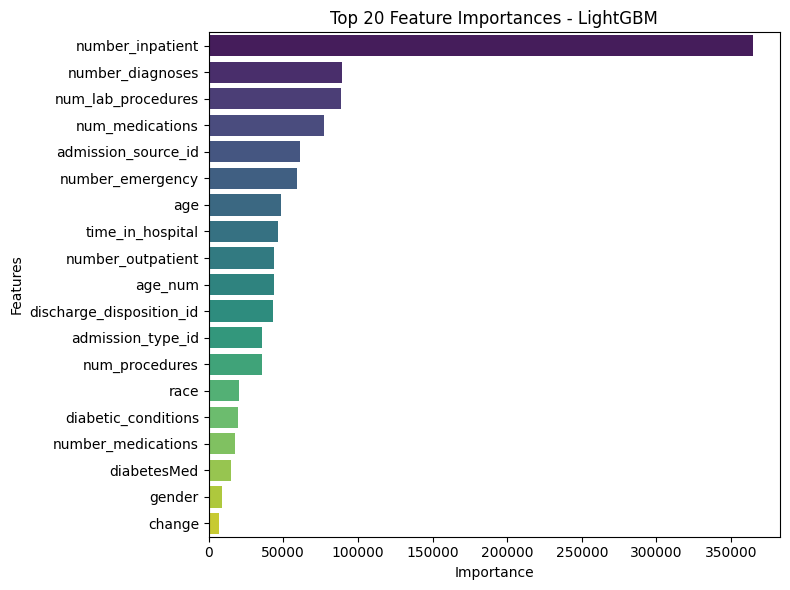

In [50]:
# Create dataframe with features and feature importances
feature_importance_df = pd.DataFrame({
    'feature': lgbm_model.feature_name_,
    'importance': lgbm_model.booster_.feature_importance(importance_type='gain')
})

# Sort and get top features
top_features = feature_importance_df.sort_values('importance', ascending=False)
top_features = top_features.head(20)

# Plot with seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')
plt.title('Top 20 Feature Importances - LightGBM')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

The top 3 most important features according to our LightGBM model are:
 
* *number_inpatient*: Number of inpatient visits of the patient in the year preceding the encounter
* *number_diagnoses*: Number of diagnoses entered to the system
* *num_lab_procedures*: Number of lab tests performed during the encounter

According to our study, the number of visits in the preceding year is the strongest predictor for hospital readmision for patients diagnosed with diabetes, following second and third place the number of diagnoses entered to the system and number of lab procedures performed during the encounter.

A 3D scatter plot enables the visualization of three predictive variables at once. In the interactive plot below, we have plotted the top three most important features, with points colored by readmission status. Rotation of the plot reveals that the classes are partially linearly separable, suggesting a hyperplane could effectively classify the data.

In [51]:
# Initialize Plotly in notebook mode
init_notebook_mode(connected=True)
# Create the interactive 3D scatter plot
fig = px.scatter_3d(
    df, 
    x='num_lab_procedures',  
    y='number_diagnoses', 
    z='number_inpatient',
    color='readmitted',  # Colored by our target
    color_discrete_sequence=px.colors.qualitative.Vivid,
    title='Top 3 most important features',
    opacity=0.8
)
# Customize marker size
fig.update_traces(marker=dict(size=3))
fig.update_layout(width=800, height=800, autosize=False)

# Show the plot
iplot(fig)

For a more comprehensive view, a scatter plot matrix of the top features provides all possible 2D cross-sections of the 3D plot simultaneously, eliminating the need for manual rotation.

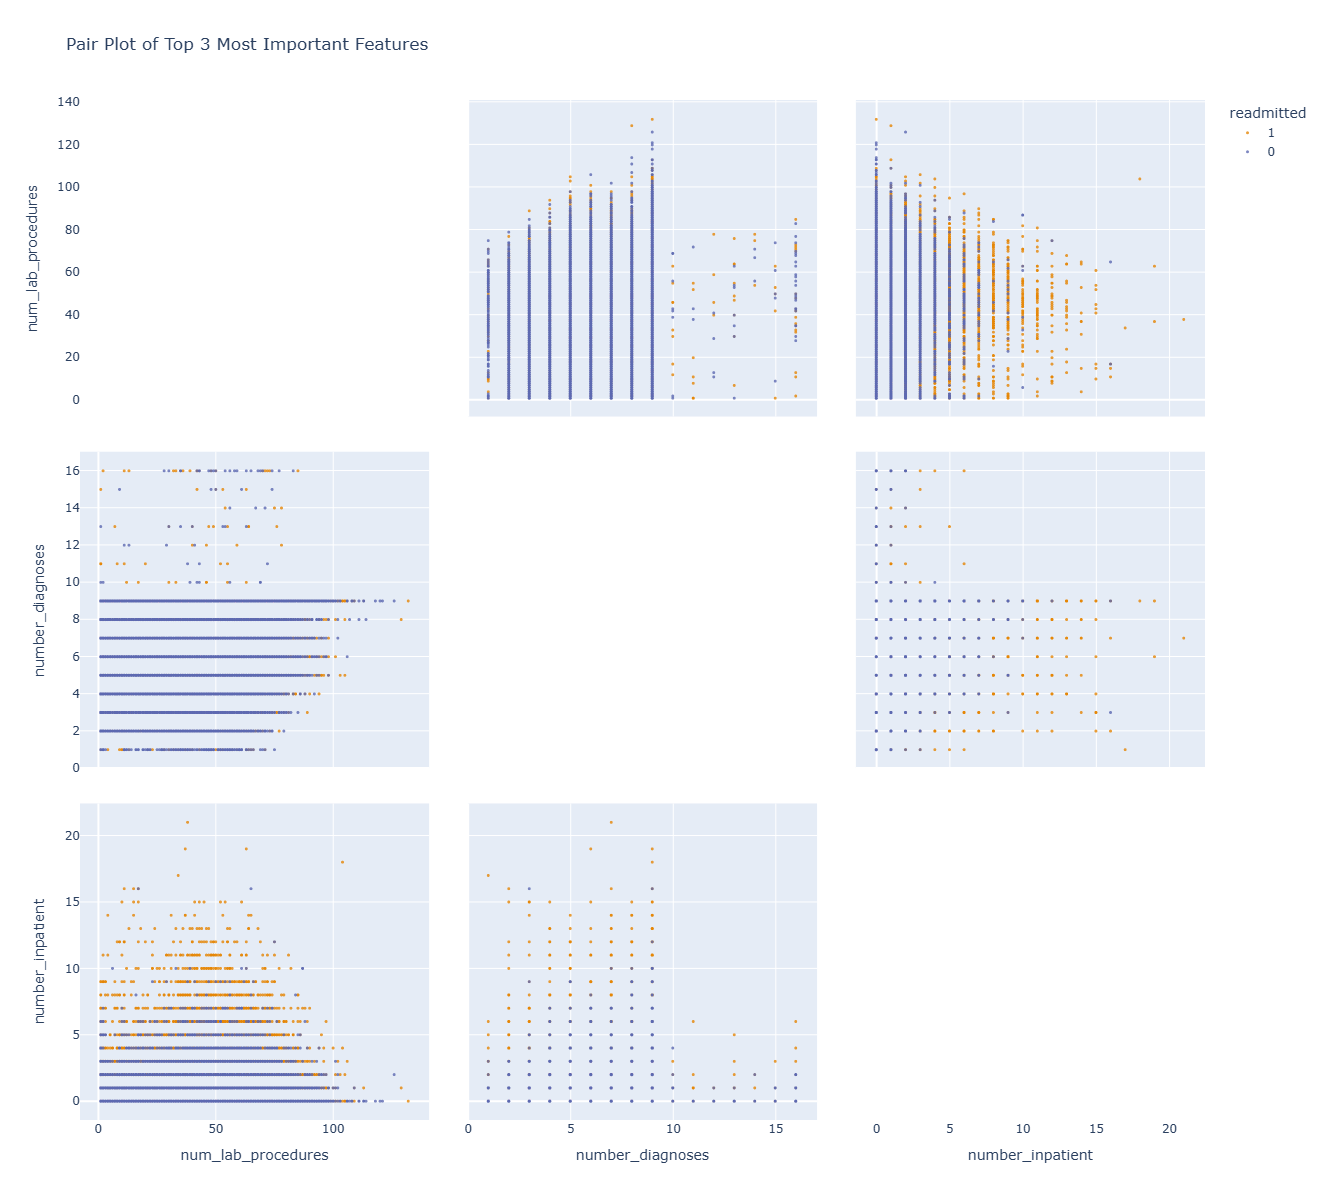

In [52]:
# Create a subset dataframe with top features and the target
plotting_df = df[['num_lab_procedures', 'number_diagnoses', 
                  'number_inpatient', 'readmitted']]

# Create the pair plot
fig = px.scatter_matrix(
    plotting_df,
    dimensions=['num_lab_procedures', 'number_diagnoses', 'number_inpatient'],
    color='readmitted',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    title="Pair Plot of Top 3 Most Important Features"
)
# Adjust marker size and opacity for the pair plot
fig.update_traces(marker=dict(size=3, opacity=0.8), diagonal_visible=False)
fig.update_layout(width=1200, height=1200, autosize=False)
fig.show()

The scatter plots reveal a separation between readmission categories, specifically, a near-horizontal boundary can distinguish classes in the number_inpatient vs. num_lab_procedures plot, while a diagonal boundary is apparent in the number_inpatient vs. number_diagnoses plot. 

While these features are important to our LightGBM model, the visible separation between classes is misleading, as the orange points represent only about 2% of readmitted patients. Consequently, these features, though useful, are not highly discriminative.

For example, the plot of number_inpatient vs. num_lab_procedures suggests a visual class separation for *number_inpatient >= 6*, quantitative analysis reveals that this distinction is not statistically significant, representing only around 2.2% of the data

In [53]:
# Create new dataframe comparing overall readmision
result_df = pd.DataFrame({
    'readmitted (6+ inpatient)': df[df.number_inpatient >= 6].readmitted.value_counts(),
    'readmitted (overall)': df.readmitted.value_counts()
})
print(result_df)

            readmitted (6+ inpatient)  readmitted (overall)
readmitted                                                 
0                                 136                 49753
1                                 974                 44309


In [54]:
pr = (result_df.iloc[1, 0] / result_df.iloc[1, 1]) *100
print(f"Percentage of readmitted patients with 6 or more visits {pr:.2f} %")

Percentage of readmitted patients with 6 or more visits 2.20 %


### 6.4. Evaluation & Threshold Comparison of the Chosen Model

The final model selected was the Light Gradient Boosting Machine (LGBM), and two decision thresholds were evaluated.

In a trial and error manner, we adjust the threshold of our LGBM classifier aiming to produce a classification report where the F1-score on both classes is maximized:

Threshold = **0.475**
- Class 0: Slightly higher precision but lower recall, leading to a small increase in false positives.  
- Class 1: Slightly lower precision but higher recall, resulting in fewer false negatives.  
- Overall: This configuration prioritizes **efficient resource use**. It identifies more high-risk patients, though at the cost of slightly more unnecessary interventions, yielding a more balanced model.

In [55]:
threshold = 0.475
y_pred_lgbm = lgbm_model.predict_proba(X_test)[:, 1] > threshold
print("Classification Report of LGBM classifier:")
print(classification_report(y_test, y_pred_lgbm))

Classification Report of LGBM classifier:
              precision    recall  f1-score   support

           0       0.67      0.60      0.64      4976
           1       0.60      0.67      0.64      4431

    accuracy                           0.64      9407
   macro avg       0.64      0.64      0.64      9407
weighted avg       0.64      0.64      0.64      9407



Considering that false negatives are generally more costly in healthcare, we select a model that maximizes the F1-score for class 0 while maintaining the highest F1-score for class 1:

Threshold = **0.415**  
- Class 0: Higher precision but lower recall, leading to a 15% increase in false positives.  
- Class 1: Slightly lower precision but substantially higher recall, resulting in 12% fewer false negatives.  
- Overall: This configuration prioritizes **patient safety**, reducing the likelihood of missed readmissions. The trade-off is an increase in unnecessary interventions, as more patients are flagged as high-risk even when they will not be readmitted.

In [56]:
threshold = 0.415
y_pred_lgbm = lgbm_model.predict_proba(X_test)[:, 1] > threshold
print("Classification Report of LGBM classifier:")
print(classification_report(y_test, y_pred_lgbm))

Classification Report of LGBM classifier:
              precision    recall  f1-score   support

           0       0.70      0.45      0.55      4976
           1       0.56      0.79      0.66      4431

    accuracy                           0.61      9407
   macro avg       0.63      0.62      0.60      9407
weighted avg       0.64      0.61      0.60      9407



The choice of the threshold will depend on hospital priorities. For institutions aiming at **preventing readmissions** for patient safety, the **0.415 threshold** is preferable. If the goal is **optimizing resource efficiency** with a manageable alert rate, then **0.475** is the better option.  

## 7. Conclusions, Insights & Next Steps  

### 7.1. Key Conclusions

The LGBM classifier demonstrated a solid balance between precision and recall, with a ROC-AUC of 0.69, showing that it can adapt well to the complexity of readmission prediction. By tuning the decision threshold, the model provides flexibility to align with different clinical priorities, whether the focus is on minimizing missed cases or reducing unnecessary interventions.

One of the most important findings is the model’s sensitivity to threshold adjustments. Even small changes in the decision threshold lead to significant shifts in outcomes, underscoring the need to move beyond the default 0.5 cutoff. Instead, threshold selection should be carefully tailored to the hospital’s strategy and tolerance for risk, ensuring that the model serves the specific needs of the clinical environment.

In terms of feature relevance, the most influential predictors include hospital visits in the previous year, number of laboratory procedures made during the encounter, and number of diagnoses registered of diabetic patients. These variables align closely with established clinical reasoning, reinforcing both the interpretability and credibility of the model’s outputs.



### 7.2. Insights for Healthcare Providers

Deploying the LGBM model with a carefully chosen threshold enables real-time identification of at-risk diabetic inpatients before discharge. This operational use case highlights the model’s potential as a decision-support tool, giving clinicians the ability to intervene proactively rather than reactively.

From a clinical perspective, the results show that patients with more complex histories of hospital use are at the greatest risk of readmission. This finding underscores the importance of targeted discharge planning and structured follow-up care, ensuring that the most vulnerable patients receive the attention they need to reduce avoidable readmissions.

At the same time, the model offers flexibility in how hospitals allocate resources. A lower threshold prioritizes patient safety by catching more high-risk cases, while a higher threshold emphasizes efficiency by reducing unnecessary interventions. This adaptability is a strength of the approach, allowing institutions to align the model’s behavior with their strategic and clinical priorities.

### 7.3. Next Steps

1. **Better Data Collection**
   
- Current dataset limitations restrict the overall predictive power of the model, and additional feature engineering on the existing variables is unlikely to produce substantial improvements. While the model performs reasonably well, its accuracy is ultimately constrained by the quality and scope of the available data. To enhance predictive performance, the inclusion of more granular clinical variables is essential. Factors such as laboratory results, vital signs, etc., would provide richer clinical context, allowing the model to capture patient risk profiles with greater precision. Equally important is the integration of post-discharge factors, which play a critical role in readmission risk. Variables related to access to care, medication adherence, social support would potentially improve model accuracy, ensuring provided data better reflect the real-world challenges patients face after leaving the hospital.

2. **Clinical Deployment**
   
- Decision threshold selection should be done collaboratively with medical staff to ensure that the model aligns with clinical priorities and risk tolerance, creating a  balance between patient safety or resource efficiency according to the hospital’s strategy. In addition, model outputs should be integrated into hospital systems, showing key predictors for each prediction so clinicians can interpret the results facilitating informed decision-making

- After deployment, it is important to continuously monitor the model’s real-world performance to ensure it maintains accuracy and reliability over time. Thresholds should be periodically recalibrated as more recent data becomes available. This ongoing adjustment ensures that the model remains aligned with current clinical realities and hospital priorities, maintaining both effectiveness and safety.

### 7.4. Final Remark

The LGBM model, particularly when applying threshold tuning between 0.415 and 0.475, demonstrates strong practical value and interpretability for predicting readmissions in diabetic patients. However, achieving substantial performance gains depends less on increasing model complexity and more on **collecting richer**, **higher-quality patient data**. I recommend postponing deployment until we can integrate richer, higher-quality data. This crucial step will provide the model with the necessary clinical and post-discharge context, ultimately leading to more accurate and reliable predictions before launch